In [2]:
import pymongo
import pandas as pd
import re

In [3]:
user = 'team04'
pw = '1111'
host = 'ec2-54-95-8-243.ap-northeast-1.compute.amazonaws.com'
client = pymongo.MongoClient(f'mongodb://{user}:{pw}@{host}:27017/')
db = client.resell

In [4]:
df = pd.DataFrame(db.news.find())
df

,_id,news_title,news_time
0,62df3dd76cb14be4413a9c21,"""오픈런으로 산 '샤넬백', 300만원이나 뚝 떨어졌다"" 한숨 [안혜원의 명품의세계]",2022/07/24
1,62df3dd76cb14be4413a9c22,"13만원짜리 나이키 운동화, 3천만원까지 뛰게한 이녀석의 정체",2022/07/23
2,62df3dd76cb14be4413a9c23,351만원 신발이 2000만원?…'로또 운동화' 리셀가 껑충,2022/07/21
3,62df3dd76cb14be4413a9c24,‘X’ 전성시대…가격은? 콜라보의 정석,2022/07/21
4,62df3dd86cb14be4413a9c25,출근길 변호사도 회계사도…'디그' 없인 못살아요,2022/07/20
...,...,...,...
464,62df3de86cb14be4413a9df1,"‘제1회 MK스포츠배 연예인 야구대회’, 본에스티스가 후원",2018/05/30
465,62df3de86cb14be4413a9df2,리미티드 에디션이라는 강력한 유혹 당신은 가지고 계시나요?,2018/05/15
466,62df3de86cb14be4413a9df3,`마블 리셀` 해도 너무한 거 아닌가요?,2018/05/09
467,62df3de86cb14be4413a9df4,"“건강한 피부가 행복을”…김태진, 본에스티스 홍보대사 발탁",2018/05/01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         469 non-null    object
 1   news_title  469 non-null    object
 2   news_time   469 non-null    object
dtypes: object(3)
memory usage: 11.1+ KB


In [6]:
new_df = df.drop(columns=['_id'])
new_df.head()

,news_title,news_time
0,"""오픈런으로 산 '샤넬백', 300만원이나 뚝 떨어졌다"" 한숨 [안혜원의 명품의세계]",2022/07/24
1,"13만원짜리 나이키 운동화, 3천만원까지 뛰게한 이녀석의 정체",2022/07/23
2,351만원 신발이 2000만원?…'로또 운동화' 리셀가 껑충,2022/07/21
3,‘X’ 전성시대…가격은? 콜라보의 정석,2022/07/21
4,출근길 변호사도 회계사도…'디그' 없인 못살아요,2022/07/20


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_title  469 non-null    object
 1   news_time   469 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB


In [8]:
def NewsTimePreprocessing(data):
    data = data.replace('/', '-')
    
    return data

In [9]:
new_df['news_time'] = new_df['news_time'].apply(NewsTimePreprocessing)
new_df

,news_title,news_time
0,"""오픈런으로 산 '샤넬백', 300만원이나 뚝 떨어졌다"" 한숨 [안혜원의 명품의세계]",2022-07-24
1,"13만원짜리 나이키 운동화, 3천만원까지 뛰게한 이녀석의 정체",2022-07-23
2,351만원 신발이 2000만원?…'로또 운동화' 리셀가 껑충,2022-07-21
3,‘X’ 전성시대…가격은? 콜라보의 정석,2022-07-21
4,출근길 변호사도 회계사도…'디그' 없인 못살아요,2022-07-20
...,...,...
464,"‘제1회 MK스포츠배 연예인 야구대회’, 본에스티스가 후원",2018-05-30
465,리미티드 에디션이라는 강력한 유혹 당신은 가지고 계시나요?,2018-05-15
466,`마블 리셀` 해도 너무한 거 아닌가요?,2018-05-09
467,"“건강한 피부가 행복을”…김태진, 본에스티스 홍보대사 발탁",2018-05-01


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_title  469 non-null    object
 1   news_time   469 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB


In [11]:
new_df['news_time'] = pd.to_datetime(new_df['news_time'])
new_df['news_time']

0     2022-07-24
1     2022-07-23
2     2022-07-21
3     2022-07-21
4     2022-07-20
         ...    
464   2018-05-30
465   2018-05-15
466   2018-05-09
467   2018-05-01
468   2018-04-04
Name: news_time, Length: 469, dtype: datetime64[ns]

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   news_title  469 non-null    object        
 1   news_time   469 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 7.5+ KB


In [13]:
# 년
new_df['news_time'] = new_df['news_time'].dt.year
new_df

,news_title,news_time
0,"""오픈런으로 산 '샤넬백', 300만원이나 뚝 떨어졌다"" 한숨 [안혜원의 명품의세계]",2022
1,"13만원짜리 나이키 운동화, 3천만원까지 뛰게한 이녀석의 정체",2022
2,351만원 신발이 2000만원?…'로또 운동화' 리셀가 껑충,2022
3,‘X’ 전성시대…가격은? 콜라보의 정석,2022
4,출근길 변호사도 회계사도…'디그' 없인 못살아요,2022
...,...,...
464,"‘제1회 MK스포츠배 연예인 야구대회’, 본에스티스가 후원",2018
465,리미티드 에디션이라는 강력한 유혹 당신은 가지고 계시나요?,2018
466,`마블 리셀` 해도 너무한 거 아닌가요?,2018
467,"“건강한 피부가 행복을”…김태진, 본에스티스 홍보대사 발탁",2018


In [14]:
new_df['news_time'].value_counts()

2021    226
2022    165
2020     51
2019     15
2018     12
Name: news_time, dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_title  469 non-null    object
 1   news_time   469 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [16]:
new_df['news_time'] = new_df['news_time'].astype(float)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   news_title  469 non-null    object 
 1   news_time   469 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

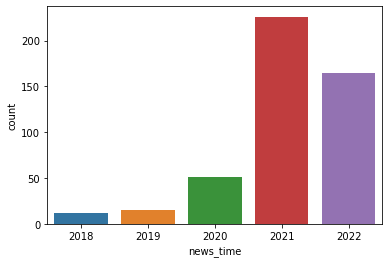

In [57]:
sns.countplot(x='news_time', data=new_df)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22544\1110086526.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ys-" (-> color='y'). The keyword argument will take precedence.
  plt.plot(year, count, 'ys-', color='r')


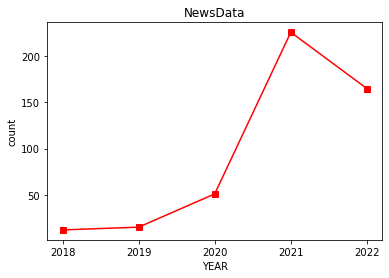

In [58]:
year = [2018,2019,2020,2021,2022]
count = [12, 15, 51, 226, 165]

plt.title('NewsData')
plt.xlabel('YEAR')
plt.ylabel('count')
plt.plot(year, count, 'ys-', color='r')
plt.xticks(year)
plt.show()